In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
import numpy as np

In [4]:
# # Set display options in Pandas to see full outputs
# pd.set_option('display.max_rows', None)  # to display all rows
# pd.set_option('display.max_columns', None)  # to display all columns
# pd.set_option('display.width', None)  # to ensure the complete width of columns is displayed
# pd.set_option('display.max_colwidth', None)  # to display the full content of each column


In [5]:
df = pd.read_excel("/Users/debane/Documents/MS Data Science/680/P2/MyFoodData Nutrition Facts SpreadSheet for Project.xlsx", header=1)

In [6]:
#df.head() # commented out for brevity

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14164 entries, 0 to 14163
Columns: 170 entries, ID to 200 Calorie Weight (g)
dtypes: float64(158), int64(1), object(11)
memory usage: 18.4+ MB
None


In [8]:
# Sorting the column names in alphabetical order
sorted_columns = sorted(df.columns)

# Iterating through the sorted list and printing each column name with its count of non-null values
for col in sorted_columns:
    print(f"{col}: {df[col].notnull().sum()}")

10:0 (mg): 12639
12:0 (mg): 12821
13:0 (mg): 263
14:0 (mg): 13164
14:1 (mg): 2725
15:0 (mg): 2373
15:1 (mg): 2076
16:0 (mg): 13370
16:1 (mg): 13153
16:1 c (mg): 1382
16:1 t (mg): 1251
17:0 (mg): 2755
17:1 (mg): 2459
18:0 (mg): 13360
18:1 (mg): 13386
18:1 c (mg): 1864
18:1 t (mg): 1913
18:1-11 t (18:1t n-7) (mg): 168
18:2 (mg): 13402
18:2 CLAs (mg): 1512
18:2 i (mg): 55
18:2 n-6 c,c (mg): 1842
18:2 t not further defined (mg): 1216
18:2 t,t (mg): 352
18:3 (mg): 13311
18:3 n-3 c,c,c (ALA) (mg): 1967
18:3 n-6 c,c,c (mg): 1660
18:3i (mg): 568
18:4 (mg): 12078
200 Calorie Weight (g): 14125
20:0 (mg): 2849
20:1 (mg): 12671
20:2 n-6 c,c (mg): 2487
20:3 (mg): 2284
20:3 n-3 (mg): 1035
20:3 n-6 (mg): 1260
20:4 (mg): 12675
20:4 n-6 (mg): 165
20:5 n-3 (EPA) (mg): 12171
21:5 (mg): 114
22:0 (mg): 2316
22:1 (mg): 12150
22:1 c (mg): 1164
22:1 t (mg): 878
22:4 (mg): 1069
22:5 n-3 (DPA) (mg): 12127
22:6 n-3 (DHA) (mg): 12143
24:0 (mg): 2235
24:1 c (mg): 1381
4:0 (mg): 12063
6:0 (mg): 12100
8:0 (mg): 1229

I see that there are several variables that are alternate names for the same thing, and several for different serving size. These could potentially be removed or consolidated, so we'll keep that in mind as we explore the data more.

In [9]:
# Create a dictionary with column names and their non-null value counts
column_counts = {col: df[col].notnull().sum() for col in df.columns}

# Sort the dictionary by value (count) in descending order
sorted_column_counts = dict(sorted(column_counts.items(), key=lambda item: item[1], reverse=True))

# Print each column name with its count
for col, count in sorted_column_counts.items():
    print(f"{col}: {count}")


ID: 14164
Name: 14164
Calories: 14164
Fat (g): 14164
Protein (g): 14164
Carbohydrate (g): 14164
Net-Carbs (g): 14164
Water (g): 14164
200 Calorie Weight (g): 14125
Iron, Fe (mg): 14084
Sodium (mg): 14080
Calcium (mg): 14079
Food Group: 14036
Potassium, K (mg): 13887
Phosphorus, P (mg): 13838
Saturated Fats (g): 13821
Magnesium (mg): 13792
Riboflavin (B2) (mg): 13792
Zinc, Zn (mg): 13777
Thiamin (B1) (mg): 13773
Niacin (B3) (mg): 13773
Cholesterol (mg): 13765
PRAL score (): 13749
Vitamin C (mg): 13703
Copper, Cu (mg): 13655
Fatty acids, total polyunsaturated (mg): 13650
Fatty acids, total monounsaturated (mg): 13648
Vitamin B6 (mg): 13633
Serving Weight 1 (g): 13625
Serving Description 1 (g): 13625
Fiber (g): 13602
Vitamin B-12 (mcg): 13484
Omega 6s (mg): 13403
18:2 (mg): 13402
18:1 (mg): 13386
16:0 (mg): 13370
18:0 (mg): 13360
Omega 3s (mg): 13337
18:3 (mg): 13311
Vitamin A, RAE (mcg): 13289
Selenium, Se (mcg): 13236
Folate (B9) (mcg): 13222
14:0 (mg): 13164
Retinol (mcg): 13159
16:1 (

In [10]:
# Create a dictionary with column names and their non-null value counts
column_counts = {col: df[col].notnull().sum() for col in df.columns}

# Filter to keep only columns with more than 10,000 non-null entries
filtered_column_counts = {col: count for col, count in column_counts.items() if count > 10000}

# Sort the filtered dictionary by count in descending order
sorted_filtered_column_counts = dict(sorted(filtered_column_counts.items(), key=lambda item: item[1], reverse=True))

# Print each column name with its count
for col, count in sorted_filtered_column_counts.items():
    print(f"{col}: {count}")

ID: 14164
Name: 14164
Calories: 14164
Fat (g): 14164
Protein (g): 14164
Carbohydrate (g): 14164
Net-Carbs (g): 14164
Water (g): 14164
200 Calorie Weight (g): 14125
Iron, Fe (mg): 14084
Sodium (mg): 14080
Calcium (mg): 14079
Food Group: 14036
Potassium, K (mg): 13887
Phosphorus, P (mg): 13838
Saturated Fats (g): 13821
Magnesium (mg): 13792
Riboflavin (B2) (mg): 13792
Zinc, Zn (mg): 13777
Thiamin (B1) (mg): 13773
Niacin (B3) (mg): 13773
Cholesterol (mg): 13765
PRAL score (): 13749
Vitamin C (mg): 13703
Copper, Cu (mg): 13655
Fatty acids, total polyunsaturated (mg): 13650
Fatty acids, total monounsaturated (mg): 13648
Vitamin B6 (mg): 13633
Serving Weight 1 (g): 13625
Serving Description 1 (g): 13625
Fiber (g): 13602
Vitamin B-12 (mcg): 13484
Omega 6s (mg): 13403
18:2 (mg): 13402
18:1 (mg): 13386
16:0 (mg): 13370
18:0 (mg): 13360
Omega 3s (mg): 13337
18:3 (mg): 13311
Vitamin A, RAE (mcg): 13289
Selenium, Se (mcg): 13236
Folate (B9) (mcg): 13222
14:0 (mg): 13164
Retinol (mcg): 13159
16:1 (

In [11]:
print(df.isnull().sum())

ID                               0
Name                             0
Food Group                     128
Calories                         0
Fat (g)                          0
                             ...  
Serving Weight 8 (g)         13395
Serving Description 8 (g)    13395
Serving Weight 9 (g)         13458
Serving Description 9 (g)    13458
200 Calorie Weight (g)          39
Length: 170, dtype: int64


In [12]:
# Calculate the percentage of null values for each column
null_percentage = df.isnull().sum() / len(df) * 100

# Filter columns where the percentage of null values is greater than 75%
columns_with_high_nulls = null_percentage[null_percentage > 80]

# Print the result
print(columns_with_high_nulls)


Added Sugar (g)              100.000000
Soluble Fiber (g)            100.000000
Insoluble Fiber (g)          100.000000
Sucrose (g)                   87.764756
Glucose (Dextrose) (g)        87.715335
                                ...    
Serving Description 7 (g)     92.120870
Serving Weight 8 (g)          94.570743
Serving Description 8 (g)     94.570743
Serving Weight 9 (g)          95.015532
Serving Description 9 (g)     95.015532
Length: 70, dtype: float64


Upon reviewing the data, I see that there are null values under the vitamins, which can be converted to 0 as they are not present (or are in trace amounts).

In [13]:
#df.describe() #commented out for brevity but screenshot is below

,ID,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g),Calcium (mg),...,Serving Weight 1 (g),Serving Weight 2 (g),Serving Weight 3 (g),Serving Weight 4 (g),Serving Weight 5 (g),Serving Weight 6 (g),Serving Weight 7 (g),Serving Weight 8 (g),Serving Weight 9 (g),200 Calorie Weight (g)
count,14164.000000,14164.000000,14164.000000,14164.000000,14164.000000,12378.000000,13602.000000,13765.000000,13821.000000,14079.000000,...,13625.000000,8098.000000,3652.000000,2576.000000,2103.000000,1504.000000,1116.000000,769.000000,706.000000,14125.000000
mean,447548.035866,194.151978,9.183089,10.119597,18.126399,6.373473,1.844758,39.483908,3.020328,69.108672,...,121.313306,206.987120,180.210077,150.900776,152.347979,141.771941,154.383065,147.713134,180.297606,260.567466
std,305426.062435,149.775561,13.454870,9.744744,22.227239,12.362457,3.397075,106.646348,5.395870,160.294003,...,112.435362,318.773175,288.311610,197.589935,191.426284,181.119765,191.152104,227.459574,280.548494,906.208292
min,167512.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,22.173000
25%,171052.750000,80.000000,1.637500,2.190000,2.200000,0.270000,0.000000,0.000000,0.403000,12.000000,...,31.000000,35.000000,31.000000,30.000000,24.500000,25.750000,28.000000,18.000000,21.250000,74.349000
50%,174593.500000,158.000000,4.840000,6.870000,9.850000,1.880000,0.900000,7.000000,1.438000,27.000000,...,93.000000,130.000000,103.000000,110.000000,107.000000,82.000000,120.000000,59.000000,33.500000,125.786000
75%,784718.250000,269.000000,11.890000,16.872500,22.882500,5.650000,2.300000,62.000000,3.667000,74.000000,...,175.000000,248.000000,236.250000,175.000000,185.500000,171.000000,185.000000,161.000000,170.000000,246.914000
max,789770.000000,902.000000,100.000000,88.320000,100.000000,99.800000,79.000000,3100.000000,95.600000,7364.000000,...,1836.000000,5717.000000,4518.000000,2048.000000,1896.000000,1524.000000,1800.000000,1351.000000,1384.000000,20000.000000


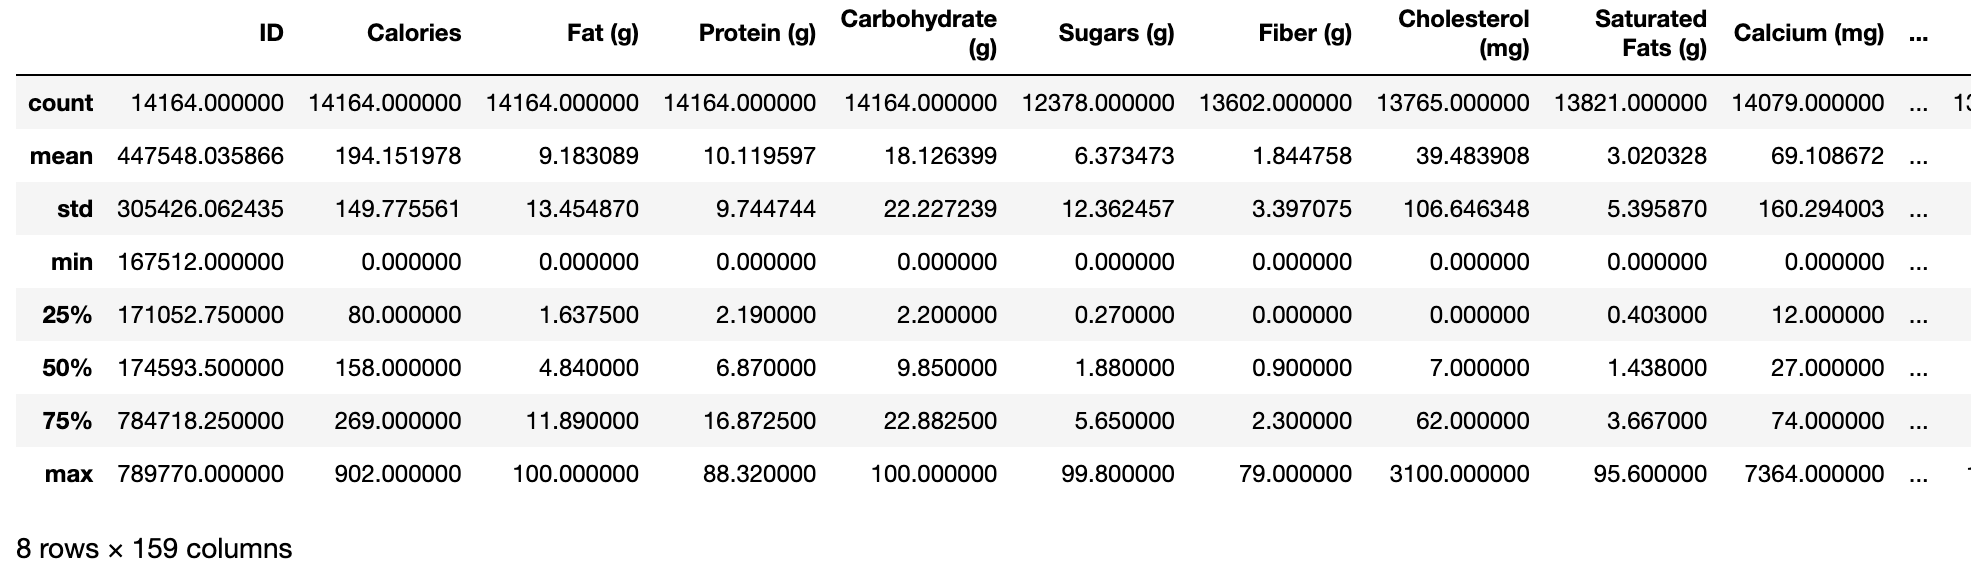

As we look at the descriptive statistics, we can see that there are 14,164 items on the list with an average of 194 calories per serving. The caloric content is in weight (grams). Having this scaled caloric count provides a even comparison in which to sort items. 

Univariate analysis allows us to analyze the distribution of variables using visualizations such as histograms and count plots. We will proceed with that for the caloric content, aguably the most notable part of a food, and food groups.

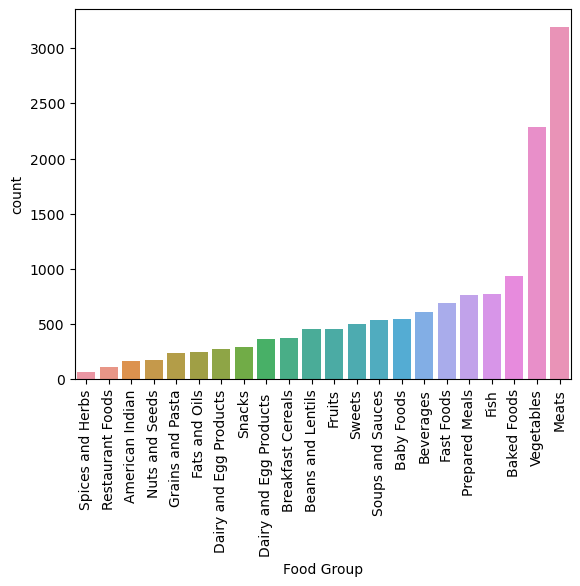

/Users/debane/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


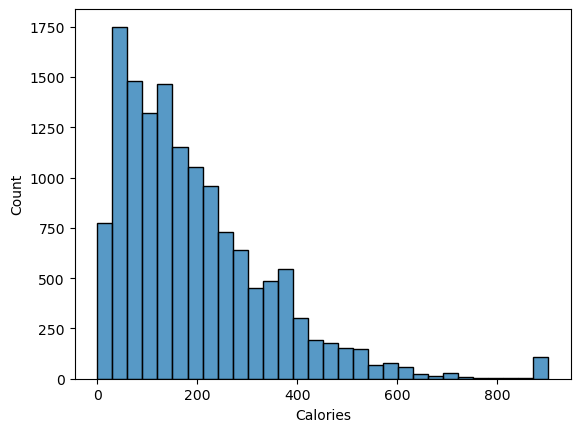

In [14]:
# Sorted count plot of food groups
sns.countplot(x='Food Group', data=df, 
              order=df['Food Group'].value_counts().sort_values().index)
plt.xticks(rotation=90)  # Rotates the labels
plt.show()

# Histogram of calorie distribution
sns.histplot(df['Calories'], bins=30)
plt.show()

We can see that the calorie values are distributed a bit abnormally because the most common food groups included are meats and vegetables, which are unlikely to be super calorically dense per serving, and in general, foods single servings of any food tend to fall below 400 calories. However, there are some at the high end of the spectrum. I'm cuious what those are, so I'll look at foods/food groups above 600 calories. 

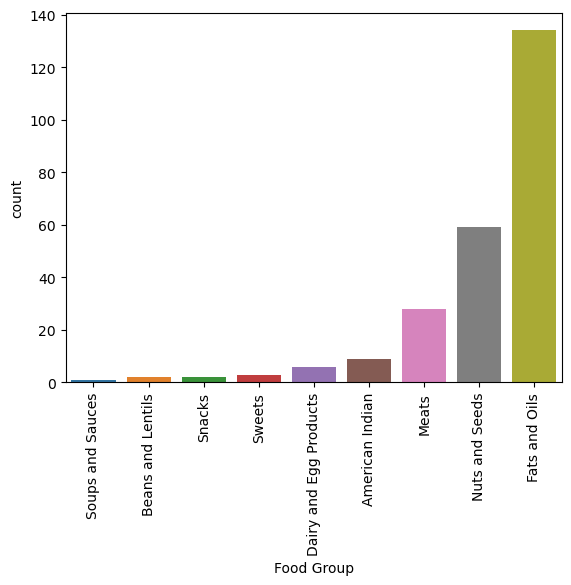

In [15]:
# Sorted count plot of high-calorie food groups
df_high_cal = df[df['Calories'] >= 600]

# Sorted count plot of food groups
sns.countplot(x='Food Group', data=df_high_cal, 
              order=df_high_cal['Food Group'].value_counts().sort_values().index)
plt.xticks(rotation=90)  # Rotates the labels
plt.show()


That makes sense, there are mostly high-calorie density foods in the Fats & Oils, Nuts and Seeds, and some meats - all known for their fat content.

Bivariate analysis allows us to explore the relationship between multiple variables. This is useful for seeing the proportion of macronutrients (carbohydrate, protein, fat) against caloric value, and which food groups have the greatest average calories. 

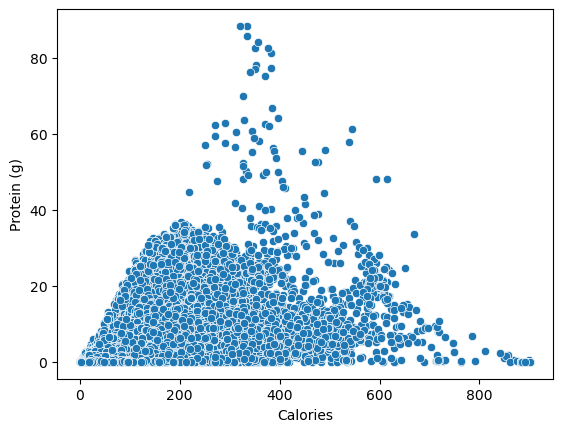

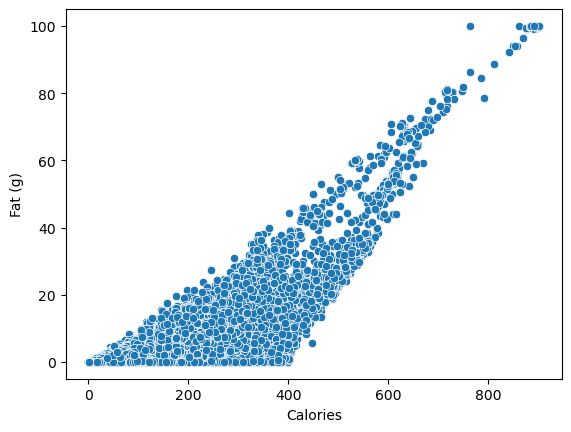

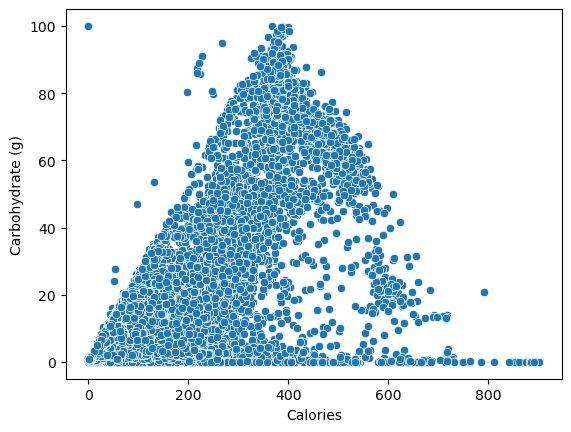

In [16]:
# Calories from Protein
sns.scatterplot(x='Calories', y='Protein (g)', data=df)
plt.show()

# Calories from Fat
sns.scatterplot(x='Calories', y='Fat (g)', data=df)
plt.show()

# Calories from Carbohydrate 
sns.scatterplot(x='Calories', y='Carbohydrate (g)', data=df)
plt.show()

These plots, although a bit overwhelming, display where outliers are present. Carbohydrates and protein both have 4 calories per gram while fat as 9 calories. The way each scatter plot is distributed make sense if think about the foods that we eat. This is important to understand about how a model might recognize these patterns to categorize food.

There are many options for higher protein with fewer calories from carbs and fat (lean meat), but it's also likely that as the higher the protein, the more other macronutrients are associated, increasing caloric density. Because fat has is more calorically dense than protein or carbohydrates, it has a more direct impact on the calorie content of a food, demonstrated by the consistent increase on the plot, making it linear. Carbohydrates are present in nearly every food, regardless of its protein and fat content, but there are some at the high end of the spectrum that are carb-dense that are frequently eaten (like baked goods, pastas, etc.).

/Users/debane/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


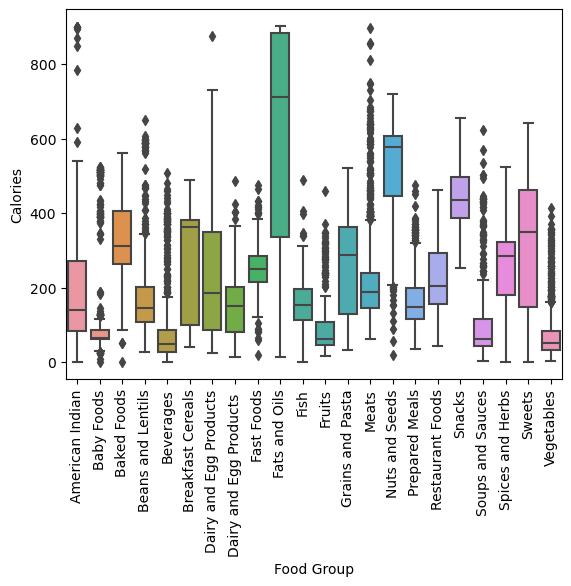

In [17]:
# While I make the box plot, I'm going to convert the Food Groups variable to category for sorting, but I am doing it in a replicated dataframe even  though categorical conversion will be important for modeling, but I want to continue exploring before making adjustments to the data. I attempted to sort by value, but the visualization was not any clearer. This is the best method for visualizing the spread of caloric densities.

# Replicate dataframe
df2 = df

# Ensure that 'Food Group' is of type 'category' to help with sorting
df2['Food Group'] = df2['Food Group'].astype('category')

# Sort the 'Food Group' categories alphabetically
df2['Food Group'] = df2['Food Group'].cat.reorder_categories(df2['Food Group'].cat.categories.sort_values(), ordered=True)

# Create boxplot with sorted categories 
sns.boxplot(x='Food Group', y='Calories', data=df2) 
plt.xticks(rotation=90)
plt.show()

# removed code from value sorting 
# sns.boxplot(x='Food Group', y='Calories', data=df2, order=df['Food Group']
#             .value_counts().sort_values().index)


This provides a visualization of the central values of each Food Group as well as the outliers.

A correlation analysis will check the relationship between the continuous variables of our dataset. A relationship is represented by a positive value (as one increases, the other increases), negative value (as one increases the other decreases), or 0, indicating no relationship. 

Before we can perform this, though, we need to take care of null values. We know that using mean, median, or mode for imputation is not appropriate for the nutrient columns because the null values indicate the lack of that substance (or there is no tracable amount). Therefore, we can comfortably replace those continuous NaN values with 0, then perform the correlation.

In [18]:
df.columns[95:117]

Index(['Stigmasterol (mg)', 'Campesterol (mg)', 'Beta-sitosterol (mg)',
       '15:0 (mg)', '17:0 (mg)', '24:0 (mg)', '16:1 t (mg)', '18:1 t (mg)',
       '22:1 t (mg)', '18:2 t not further defined (mg)', '18:2 i (mg)',
       '18:2 t,t (mg)', '18:2 CLAs (mg)', '24:1 c (mg)', '20:2 n-6 c,c (mg)',
       '16:1 c (mg)', '18:1 c (mg)', '18:2 n-6 c,c (mg)', '22:1 c (mg)',
       '18:3 n-6 c,c,c (mg)', '17:1 (mg)', '20:3 (mg)'],
      dtype='object')

In [19]:
# Exclude identifier and serving recommendation columns by column index or name
# Assuming that the last 19 columns are serving recommendations and the first 2 are ID and name
# Identify the columns to exclude
exclude_first_cols = 3  # Number of columns from the start to exclude
exclude_last_cols = 19  # Number of columns from the end to exclude

# Select the DataFrame with only the continuous columns (excluding the specified ones)
continuous_data_df = df[df.columns[exclude_first_cols:-exclude_last_cols]]

# Replace null values with zeros in the specified DataFrame
continuous_data_df = continuous_data_df.fillna(0)

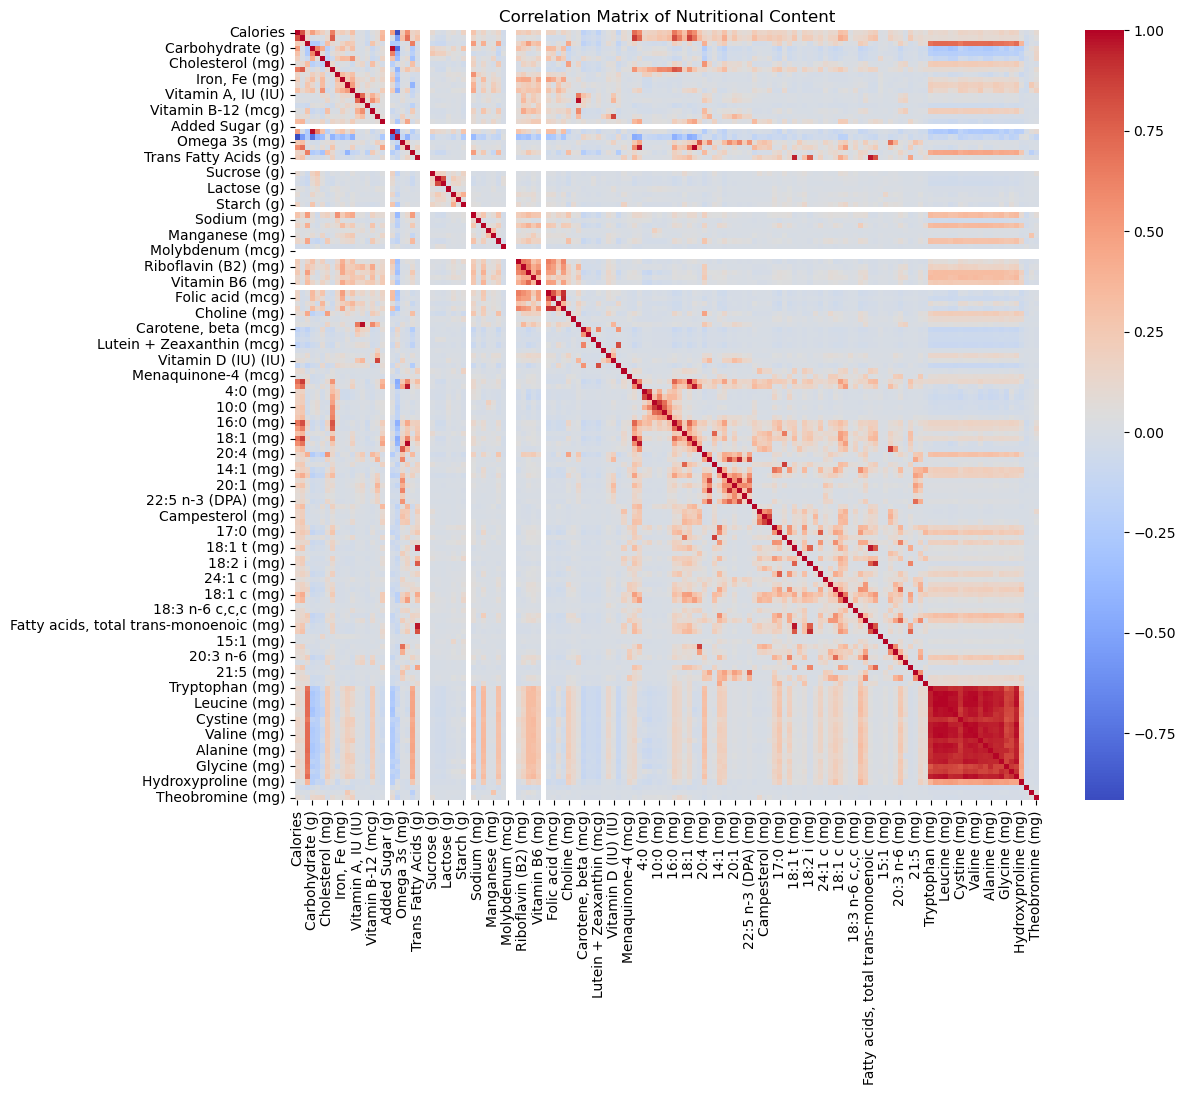

In [20]:
# Calculate the correlation matrix
correlation_matrix = continuous_data_df.corr()

# Visualize matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Nutritional Content')
plt.show()

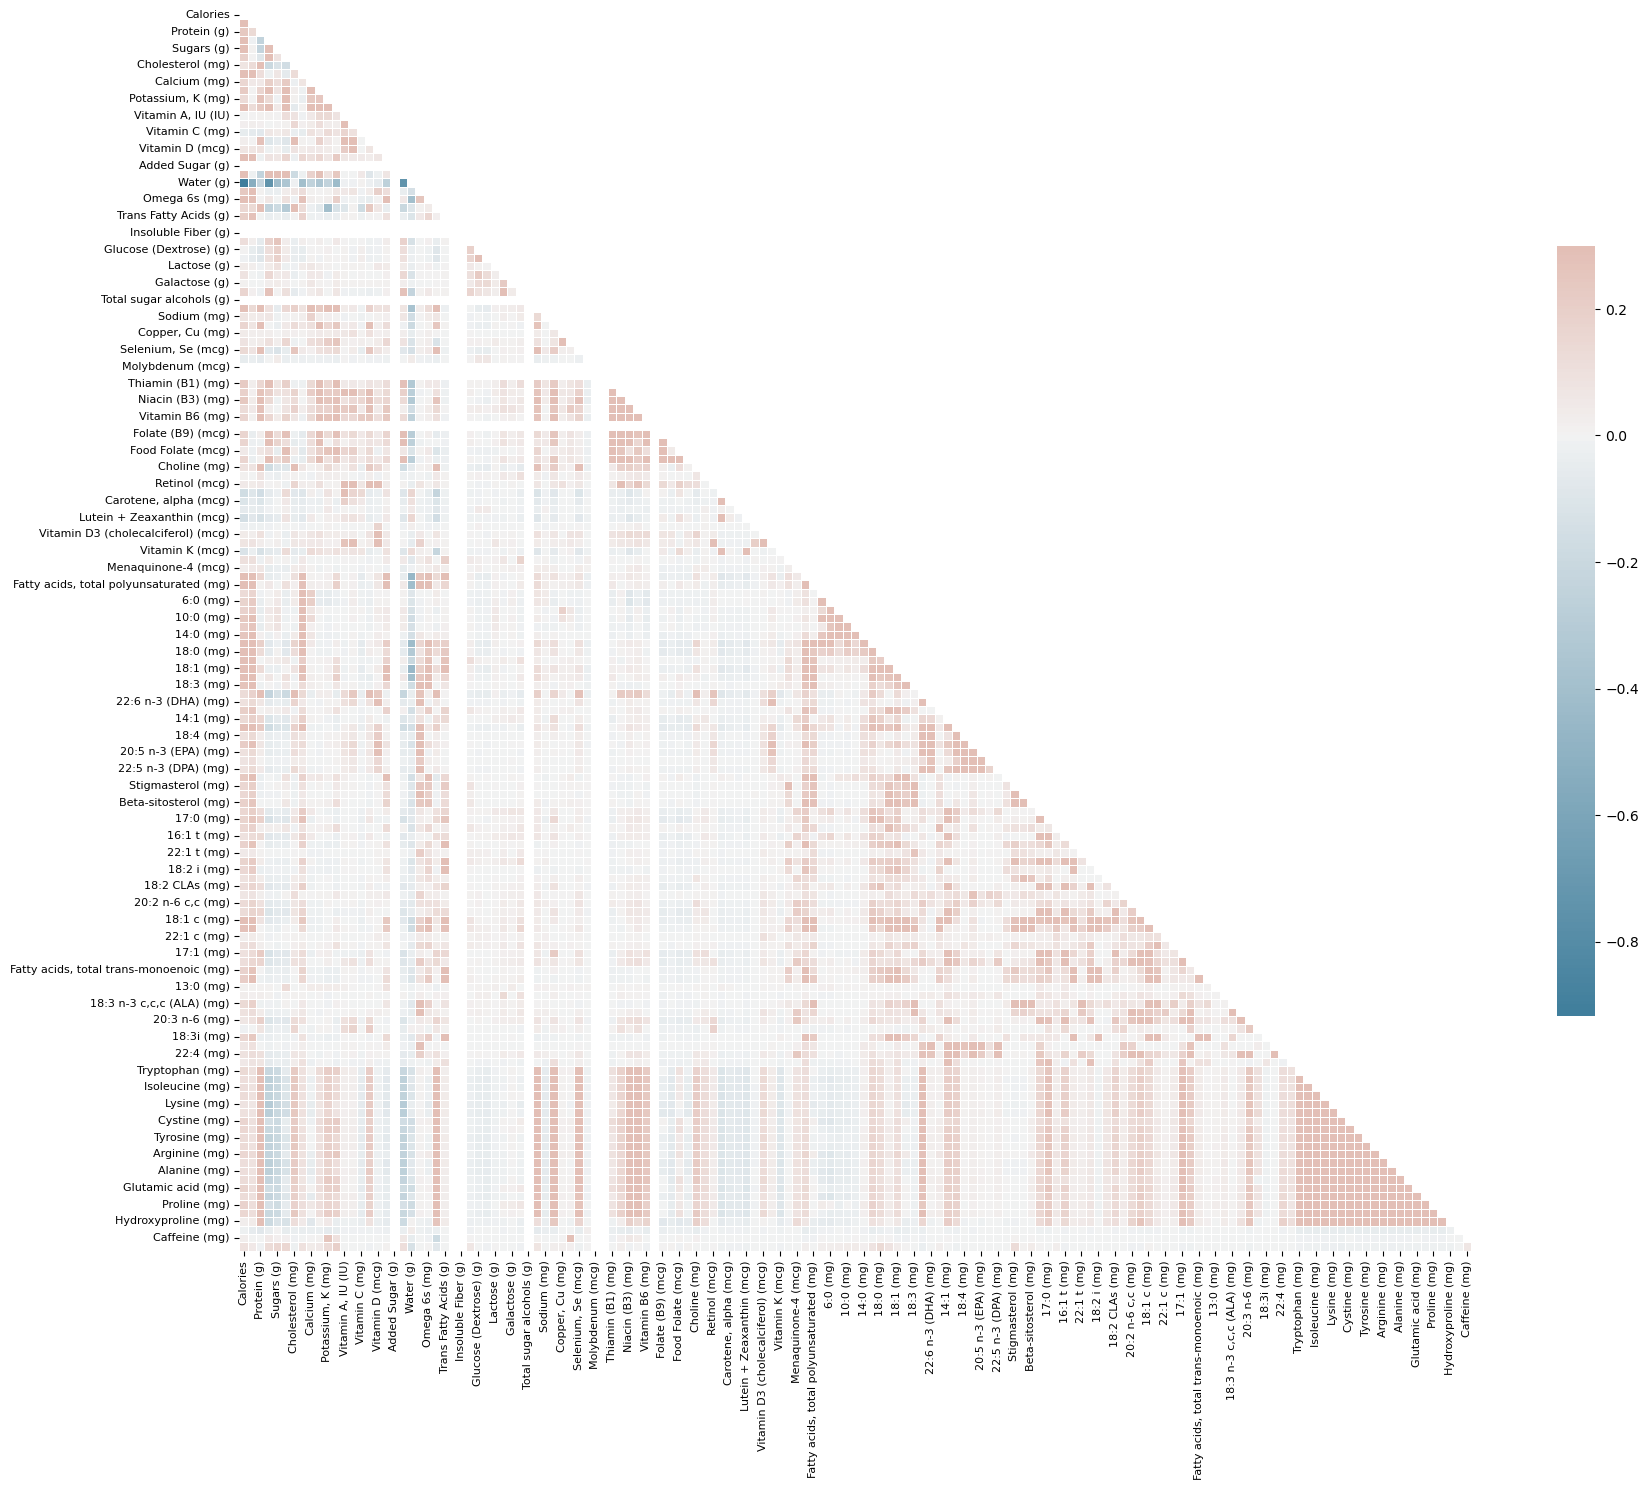

In [21]:
# Making the plot larger
plt.figure(figsize=(20, 20))

# Creating a mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generating a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)

# Improving the readability of the plot
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


In [22]:
# Unstacking the correlation matrix to get a series of pairs
correlation_pairs = correlation_matrix.unstack()

# Filtering out self-correlations (correlation of a variable with itself)
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Sorting the pairs
correlated_pairs_sorted = correlation_pairs.sort_values(kind="quicksort", ascending=False)

# Optionally, you can filter by a threshold
threshold = (0.8 or -0.8)
high_correlation_pairs = correlated_pairs_sorted[abs(correlated_pairs_sorted) > threshold]

# print(high_correlation_pairs) # commented out for brevity

In [23]:
# Count pairs of highly correlated variables
number_of_pairs = len(high_correlation_pairs)

print("Number of high correlation pairs:", number_of_pairs)

Number of high correlation pairs: 370


In [24]:
# Get output of correlations above saved as text file
# with open('corr output.txt', 'w') as f:
    # f.write(str(high_correlation_pairs)) # commented out for brevity

The first of these matrices is highly unreadable. We then created a mask and changed the sizing and coloring of the matrix. It provided a better looking matrix, but with so many variables, it's not a good presentation. Then, we created a list of the highly correlated pairs (0.8 or -0.8) to see how many there were. The length was 331, which means many of them are correlated, however, some of the variables are variations of vitamins/minerals within the food, so of course they are correlated. I need to make a summary table to review the correlated pairs and the count of values in each column in order to decide what to keep and what to drop.

Below is the code I used for the project but I've commented it out for printing brevity. There were many, many lines that looked like this: 
"Prefer Omega 6s (mg) over 18:2 (mg) - NonNull Counts: 18:2 (mg)=13402, Omega 6s (mg)=13403
Prefer Omega 6s (mg) over 18:2 (mg) - NonNull Counts: Omega 6s (mg)=13403, 18:2 (mg)=13402
Prefer Isoleucine (mg) over Valine (mg) - NonNull Counts: Valine (mg)=5083, Isoleucine (mg)=5084
Prefer Isoleucine (mg) over Valine (mg) - NonNull Counts: Isoleucine (mg)=5084, Valine (mg)=5083
Prefer Isoleucine (mg) over Leucine (mg) - NonNull Counts: Isoleucine (mg)=5084, Leucine (mg)=5083
Prefer Isoleucine (mg) over Leucine (mg) - NonNull Counts: Leucine (mg)=5083, Isoleucine (mg)=5084
Prefer Leucine (mg) over Threonine (mg) - NonNull Counts: Leucine (mg)=5083, Threonine (mg)=5080
Prefer Leucine (mg) over Threonine (mg) - NonNull Counts: Threonine (mg)=5080, Leucine (mg)=5083" 

In [67]:
# # Iterate over the high correlation pairs from the continuous_data_df analysis
# for (var1, var2), corr_value in high_correlation_pairs.items():
#     # Get non-null count for each variable in the pair from the original df
#     nonnull_count_var1 = df[var1].notnull().sum()
#     nonnull_count_var2 = df[var2].notnull().sum()

#     # Compare and decide which to keep
#     if nonnull_count_var1 >= nonnull_count_var2:
#         # Var1 has more or equal non-null values, so we might prefer to keep var1
#         print(f"Prefer {var1} over {var2} - NonNull Counts: {var1}={nonnull_count_var1}, {var2}={nonnull_count_var2}")
#     else:
#         # Var2 has more non-null values, so we might prefer to keep var2
#         print(f"Prefer {var2} over {var1} - NonNull Counts: {var1}={nonnull_count_var1}, {var2}={nonnull_count_var2}")


In [ ]:
# Reviewed the above in a text file, but commented out because no need to resave 
# Get output of correlations above saved as text file
# with open('preference output.txt', 'w') as f:
    # f.write(str(high_correlation_pairs))

In analyzing the pairs, it appears that there are many "preferred" variables that have nearly the same number of non null values as the other variable. Let's take a look at which rejected variables have more than 50% missing values in the orginal dataset.

In [26]:
# Total number of rows in the DataFrame
total_rows = len(df)

# List to hold columns to be removed
columns_to_remove = []

# Iterate over the high correlation pairs
for (var1, var2), corr_value in high_correlation_pairs.items():
    # Determine the preferred variable
    nonnull_count_var1 = df[var1].notnull().sum()
    nonnull_count_var2 = df[var2].notnull().sum()
    
    preferred_var = var1 if nonnull_count_var1 >= nonnull_count_var2 else var2

    # Check if the non-null count of the preferred variable is less than 50% of total rows
    if df[preferred_var].notnull().sum() < total_rows * 0.5:
        columns_to_remove.append(preferred_var)

# Removing duplicates from the list
columns_to_remove = list(set(columns_to_remove))

print("Columns to remove:", columns_to_remove)


Columns to remove: ['Tryptophan (mg)', 'Fructose (g)', '18:1 t (mg)', 'Methionine (mg)', 'Phenylalanine (mg)', 'Arginine (mg)', 'Trans Fatty Acids (g)', 'Cystine (mg)', '22:0 (mg)', 'Leucine (mg)', 'Valine (mg)', 'Fatty acids, total trans-polyenoic (mg)', 'Tyrosine (mg)', 'Beta-sitosterol (mg)', 'Glycine (mg)', 'Glutamic acid (mg)', 'Fatty acids, total trans-monoenoic (mg)', 'Threonine (mg)', 'Lysine (mg)', 'Alanine (mg)', 'Histidine (mg)', 'Serine (mg)', 'Isoleucine (mg)', 'Proline (mg)']


This is very validating at an intuitive level because these values make a lot of sense to remove because they are mostly amino acids that make up protein content (included for all items), and the fructose, which is a sugar (included for nearly all items).

We know from our original investigation that there are several columns with null values greater than 80%, and upon review, the same concept of being included elsewhere applies, so we may include all of those in our removal prior to modeling. I'll print them again here. 

In [27]:
# Calculate the percentage of null values for each column
null_percentage = df.isnull().sum() / len(df) * 100

# Filter columns where the percentage of null values is greater than 75%
columns_with_high_nulls = null_percentage[null_percentage > 75]

# Print the result
print(columns_with_high_nulls)


Added Sugar (g)              100.000000
Soluble Fiber (g)            100.000000
Insoluble Fiber (g)          100.000000
Sucrose (g)                   87.764756
Glucose (Dextrose) (g)        87.715335
                                ...    
Serving Description 7 (g)     92.120870
Serving Weight 8 (g)          94.570743
Serving Description 8 (g)     94.570743
Serving Weight 9 (g)          95.015532
Serving Description 9 (g)     95.015532
Length: 71, dtype: float64


Removing high nulls and highly correlated non-preffered variables.

In [28]:
# Convert to list if they are Series
columns_with_high_nulls = columns_with_high_nulls.index.tolist() if isinstance(columns_with_high_nulls, pd.Series) else columns_with_high_nulls
columns_to_remove = columns_to_remove if isinstance(columns_to_remove, list) else []

# Combine the lists
all_columns_to_remove = list(set(columns_with_high_nulls + columns_to_remove))

# Drop these columns from the DataFrame
df_cleaned = df.drop(columns=all_columns_to_remove)

# df_cleaned is now your DataFrame with the specified columns removed

Here is what we've done so far:
1. Convert null values to 0 for correlation matrix
2. Remove features with excessive missing values (more than 80%)
3. Remove features with high correlation that are low in total count from the dataset (as indicated by correlation matrix and summary table)

Let's do a couple more things:
4. Remove features with low variance
5. Remove features unnecessary for classification 

In [29]:
# Export df to csv
# df_cleaned.to_csv('output.csv', index=False) # commented out for brevity

In [30]:
print(df_cleaned.shape)
print(df_cleaned.columns)

(14164, 81)
Index(['ID', 'Name', 'Food Group', 'Calories', 'Fat (g)', 'Protein (g)',
       'Carbohydrate (g)', 'Sugars (g)', 'Fiber (g)', 'Cholesterol (mg)',
       'Saturated Fats (g)', 'Calcium (mg)', 'Iron, Fe (mg)',
       'Potassium, K (mg)', 'Magnesium (mg)', 'Vitamin A, IU (IU)',
       'Vitamin A, RAE (mcg)', 'Vitamin C (mg)', 'Vitamin B-12 (mcg)',
       'Vitamin D (mcg)', 'Vitamin E (Alpha-Tocopherol) (mg)', 'Net-Carbs (g)',
       'Water (g)', 'Omega 3s (mg)', 'Omega 6s (mg)', 'PRAL score ()',
       'Phosphorus, P (mg)', 'Sodium (mg)', 'Zinc, Zn (mg)', 'Copper, Cu (mg)',
       'Manganese (mg)', 'Selenium, Se (mcg)', 'Thiamin (B1) (mg)',
       'Riboflavin (B2) (mg)', 'Niacin (B3) (mg)',
       'Pantothenic acid (B5) (mg)', 'Vitamin B6 (mg)', 'Folate (B9) (mcg)',
       'Folic acid (mcg)', 'Food Folate (mcg)', 'Folate DFE (mcg)',
       'Choline (mg)', 'Retinol (mcg)', 'Carotene, beta (mcg)',
       'Carotene, alpha (mcg)', 'Lycopene (mcg)', 'Lutein + Zeaxanthin (mcg)',
  

Looking at variance among variables is important for recognizing which features may or may not have a strong impact on modeling, and therefore can potentially be excluded. We want to continue looking at the data without the first 3 columns (ID, name, and food group) nor the last 19 (serving suggestions) and convert the nulls to zero before reviewing the features. 

In [31]:
# Exclude the first 3 and last 7 columns
df_sub = df.iloc[:, 3:-19]

# Convert NaN values to zeros
df_sub = df_sub.fillna(0)

# Variance Analysis
selector = VarianceThreshold()
selector.fit(df_sub)

# Getting the variance of each feature
features_variance = pd.DataFrame({
    'Feature': df_sub.columns,
    'Variance': selector.variances_
})

# Displaying features with their variance
# print(features_variance) # commented out for brevity

We see that there is a broad distribution, with some of the features having very high or very low variance. Let's look at the ones with low variance by setting a threshold. In this case, we will look at all features that are 95% constant.

In [32]:
# Define a threshold
threshold = 0.05 * (1 - 0.05)  # all features that are 95% constant

# Create VarianceThreshold object
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(df_sub)  # using continuous variables

# Get the indices of features that are being kept
features = selector.get_support(indices=True)

# List all features that can be removed
low_variance_features = [column for i, column in enumerate(continuous_data_df.columns) if i not in features]

print("Low Variance Variables:", low_variance_features)

Low Variance Variables: ['Added Sugar (g)', 'Soluble Fiber (g)', 'Insoluble Fiber (g)', 'Galactose (g)', 'Total sugar alcohols (g)', 'Molybdenum (mcg)', 'Chlorine (mg)', 'Biotin (B7) (mcg)']


In [33]:
# Remove low variance features if they are in df_cleaned
for feature in low_variance_features:
    if feature in df_cleaned.columns:
        df_cleaned = df_cleaned.drop(columns=[feature])

In [34]:
# Show the first few rows of the updated DataFrame to confirm removal
print(df_cleaned.shape)
print(df_cleaned.columns)

(14164, 81)
Index(['ID', 'Name', 'Food Group', 'Calories', 'Fat (g)', 'Protein (g)',
       'Carbohydrate (g)', 'Sugars (g)', 'Fiber (g)', 'Cholesterol (mg)',
       'Saturated Fats (g)', 'Calcium (mg)', 'Iron, Fe (mg)',
       'Potassium, K (mg)', 'Magnesium (mg)', 'Vitamin A, IU (IU)',
       'Vitamin A, RAE (mcg)', 'Vitamin C (mg)', 'Vitamin B-12 (mcg)',
       'Vitamin D (mcg)', 'Vitamin E (Alpha-Tocopherol) (mg)', 'Net-Carbs (g)',
       'Water (g)', 'Omega 3s (mg)', 'Omega 6s (mg)', 'PRAL score ()',
       'Phosphorus, P (mg)', 'Sodium (mg)', 'Zinc, Zn (mg)', 'Copper, Cu (mg)',
       'Manganese (mg)', 'Selenium, Se (mcg)', 'Thiamin (B1) (mg)',
       'Riboflavin (B2) (mg)', 'Niacin (B3) (mg)',
       'Pantothenic acid (B5) (mg)', 'Vitamin B6 (mg)', 'Folate (B9) (mcg)',
       'Folic acid (mcg)', 'Food Folate (mcg)', 'Folate DFE (mcg)',
       'Choline (mg)', 'Retinol (mcg)', 'Carotene, beta (mcg)',
       'Carotene, alpha (mcg)', 'Lycopene (mcg)', 'Lutein + Zeaxanthin (mcg)',
  

In [35]:
# print(df_cleaned.head()) # commented out for brevity

Okay the dataset is currently preserved from the original, just with features removed that show high correlation or low variance. We are almost ready to start modeling, but the columns with identifiers need to be removed, and the serving suggestions can be dropped as well. The null values of the nutrients will be converted to 0.  

In [36]:
#df_cleaned.dtypes # commented out for brevity

In [39]:
# Drop identifiers and serving columns
df_prepared = df_cleaned.drop(['ID', 'Name'] + df_cleaned.columns[-7:].tolist(), axis=1)

# Fill NA values for all columns except 'Food Group'
columns_to_fill = df_prepared.columns[df_prepared.columns != 'Food Group']
df_prepared[columns_to_fill] = df_prepared[columns_to_fill].fillna(0)

In [40]:
# df_prepared.head() # commented out for brevity

Before splitting the dataset, the variables may need to be encoded or scaled/normalized. For the categorical variable (the Food Group, which is the target variable), we need to encode it into a numerical representation. Because there is no hierarchy and only 23 unique values, Label Encoder from SciKit Learn is sufficient. For the other variables (the nutrient measurements, the features), we can use a Standard Scaler.

In [41]:
# Creating a copy of the prepared DataFrame
df_encoded = df_prepared.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder on the 'Food Group' column
df_encoded['Food Group'] = le.fit_transform(df_encoded['Food Group'])

# Select all features except 'Food Group' for scaling
features_to_scale = df_encoded.drop('Food Group', axis=1).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler on the features to be scaled
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

#print(df_encoded.head())  # commented out for brevity

Split the dataset into target variable and features.

In [42]:
# Features and target variable
X = df_encoded.drop('Food Group', axis=1)
y = df_encoded['Food Group']

Now split the data into training, testing and validation sets because I want to keep out a set of data for testing later. I'll start with doing a stratified split into the training set and the temporary set, then split the temporary set into validation and testing sets. The result will be 60% of the data for training, 20% of the data for validation, and 20% of the data for testing. 

In [43]:
# Split the dataset into 60% training and 40% temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Split the temporary set into 50% validation and 50% testing set
# This results in overall 60% training, 20% validation, and 20% testing set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [44]:
# Confirm the sizes of each set
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)

Training set size: (8498, 71)
Validation set size: (2833, 71)
Testing set size: (2833, 71)


In [45]:
# Check the distribution of the target variable
y.value_counts(normalize=True)

Food Group
13    0.225360
21    0.161113
2     0.066295
10    0.054646
15    0.053869
8     0.048997
4     0.042855
1     0.038407
18    0.037560
20    0.035583
11    0.032194
3     0.031841
5     0.026546
7     0.025911
17    0.020545
6     0.019345
9     0.017086
12    0.016733
14    0.012073
0     0.011649
22    0.009037
16    0.007907
19    0.004448
Name: proportion, dtype: float64

We can finally begin modeling! The target variable (y - Food Groups) is imbalanced, so we can try the RandomForestClassifier that has the ability to weight the classes.

In [46]:
# Initialize Random Forest with balanced class weights
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.36      0.51        33
           1       0.94      0.80      0.86       109
           2       0.84      0.92      0.88       188
           3       0.87      0.80      0.83        90
           4       0.88      0.82      0.85       121
           5       0.87      0.91      0.89        75
           6       0.85      0.80      0.82        55
           7       0.89      0.91      0.90        74
           8       0.83      0.89      0.86       139
           9       0.91      0.84      0.87        49
          10       0.95      0.97      0.96       155
          11       0.80      0.86      0.83        91
          12       0.83      0.74      0.79        47
          13       0.96      0.99      0.97       638
          14       0.86      0.91      0.89        34
          15       0.84      0.74      0.78       153
          16       0.92      0.55      0.69        22
          17       0.79    

In [53]:
# GradientBoostingClassifier original data
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)  

GradientBoostingClassifier(random_state=42)

In [54]:
# Predictions for GB
y_pred_gb = gb.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_pred_gb))

              precision    recall  f1-score   support

           0       0.76      0.48      0.59        33
           1       0.88      0.82      0.85       109
           2       0.80      0.87      0.83       188
           3       0.92      0.80      0.86        90
           4       0.85      0.87      0.86       121
           5       0.89      0.87      0.88        75
           6       0.85      0.73      0.78        55
           7       0.86      0.86      0.86        74
           8       0.78      0.81      0.79       139
           9       0.91      0.80      0.85        49
          10       0.94      0.96      0.95       155
          11       0.81      0.77      0.79        91
          12       0.80      0.68      0.74        47
          13       0.96      0.97      0.97       638
          14       0.81      0.85      0.83        34
          15       0.75      0.75      0.75       153
          16       0.72      0.59      0.65        22
          17       0.73    

In [55]:
# Resample data - oversampling minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [56]:
# Random forest with oversample minority class
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)  # Use resampled data 

RandomForestClassifier(random_state=42)

In [57]:
# Evaluate random forest with minority oversample
y_pred_rf_over = rf.predict(X_val)  # Prediction for resample RF
print(classification_report(y_val, y_pred_rf_over))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.94      0.83      0.88       109
           2       0.87      0.91      0.89       188
           3       0.86      0.84      0.85        90
           4       0.90      0.84      0.87       121
           5       0.83      0.92      0.87        75
           6       0.84      0.87      0.86        55
           7       0.90      0.95      0.92        74
           8       0.82      0.87      0.85       139
           9       0.91      0.86      0.88        49
          10       0.96      0.97      0.96       155
          11       0.83      0.92      0.88        91
          12       0.83      0.83      0.83        47
          13       0.98      0.97      0.97       638
          14       0.89      0.94      0.91        34
          15       0.79      0.77      0.78       153
          16       0.83      0.68      0.75        22
          17       0.83    

In [59]:
# Gradient Boosting with oversample minority class
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_resampled, y_resampled)  # Use resampled data 

# Predictions for GB oversample minority
y_pred_gb_over = gb.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_pred_gb_over))

              precision    recall  f1-score   support

           0       0.57      0.64      0.60        33
           1       0.80      0.83      0.81       109
           2       0.89      0.82      0.85       188
           3       0.83      0.86      0.84        90
           4       0.88      0.82      0.85       121
           5       0.87      0.88      0.87        75
           6       0.88      0.78      0.83        55
           7       0.82      0.91      0.86        74
           8       0.79      0.82      0.81       139
           9       0.95      0.86      0.90        49
          10       0.94      0.97      0.96       155
          11       0.75      0.79      0.77        91
          12       0.78      0.74      0.76        47
          13       0.98      0.95      0.97       638
          14       0.80      0.97      0.88        34
          15       0.73      0.78      0.76       153
          16       0.93      0.59      0.72        22
          17       0.75    

In [60]:
# Undersample majority class
rus = RandomUnderSampler(random_state=42)
X_resampled2, y_resampled2 = rus.fit_resample(X_train, y_train)

In [61]:
# Random forest with undersample majority class
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled2, y_resampled2)  # Use resampled data 

# Evaluate random forest with majority undersample
y_pred_rf_under = rf.predict(X_val)  # Example using Random Forest
print(classification_report(y_val, y_pred_rf_under))

              precision    recall  f1-score   support

           0       0.37      0.45      0.41        33
           1       0.72      0.54      0.62       109
           2       0.88      0.68      0.77       188
           3       0.71      0.71      0.71        90
           4       0.66      0.65      0.66       121
           5       0.88      0.77      0.82        75
           6       0.79      0.82      0.80        55
           7       0.66      0.80      0.72        74
           8       0.75      0.69      0.72       139
           9       0.69      0.88      0.77        49
          10       0.93      0.95      0.94       155
          11       0.44      0.84      0.57        91
          12       0.55      0.77      0.64        47
          13       0.96      0.84      0.90       638
          14       0.70      0.88      0.78        34
          15       0.48      0.65      0.56       153
          16       0.39      0.68      0.50        22
          17       0.55    

In [62]:
# Gradient Boosting with undersample majority class
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_resampled2, y_resampled2)  # Use resampled data 

# Predictions for GB oversample minority
y_pred_gb_under = gb.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_pred_gb_under))

              precision    recall  f1-score   support

           0       0.25      0.52      0.34        33
           1       0.49      0.59      0.54       109
           2       0.80      0.56      0.66       188
           3       0.72      0.73      0.73        90
           4       0.79      0.66      0.72       121
           5       0.73      0.80      0.76        75
           6       0.80      0.71      0.75        55
           7       0.74      0.72      0.73        74
           8       0.56      0.67      0.61       139
           9       0.81      0.86      0.83        49
          10       0.88      0.86      0.87       155
          11       0.49      0.73      0.58        91
          12       0.65      0.87      0.75        47
          13       0.97      0.74      0.84       638
          14       0.61      0.88      0.72        34
          15       0.47      0.66      0.55       153
          16       0.35      0.64      0.45        22
          17       0.50    


The model performance metrics show the effectiveness of each model in classifying the food groups based on their nutritional content. Here's a summary of what these metrics indicate:

Accuracy is the overall correctness of the model across all classes, showing how often the model correctly predicts the food group.
Precision for each class indicates how many of the items predicted as belonging to that class actually do, highlighting the model's ability to avoid false positives.
Recall (or sensitivity) shows how many of the actual items of each class were correctly identified, emphasizing the model's capability to find all relevant cases.
F1-score is the harmonic mean of precision and recall, providing a balance between them for each class, useful when there's an uneven class distribution.
The results illustrate how the models perform differently across various food groups, with some groups being easier to predict than others. Models like RandomForest and GradientBoosting show high overall accuracy but have varying precision and recall across different food groups, indicating that some groups are more challenging to classify correctly due to similarities in nutritional content or imbalances in the data. The use of SMOTE and RandomUnderSampler techniques to address class imbalance affects precision, recall, and F1-scores, generally improving recall at the expense of precision, which is evident in the slight changes in these metrics between the original and resampled datasets.

In [63]:
## BEST MODEL ##
# Resample data - oversampling minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Random forest with oversample minority class
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)  # Use resampled data 

# Evaluate random forest with minority oversample
y_pred_rf_over = rf.predict(X_val)  # Prediction for resample RF
print(classification_report(y_val, y_pred_rf_over)) 

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.94      0.83      0.88       109
           2       0.87      0.91      0.89       188
           3       0.86      0.84      0.85        90
           4       0.90      0.84      0.87       121
           5       0.83      0.92      0.87        75
           6       0.84      0.87      0.86        55
           7       0.90      0.95      0.92        74
           8       0.82      0.87      0.85       139
           9       0.91      0.86      0.88        49
          10       0.96      0.97      0.96       155
          11       0.83      0.92      0.88        91
          12       0.83      0.83      0.83        47
          13       0.98      0.97      0.97       638
          14       0.89      0.94      0.91        34
          15       0.79      0.77      0.78       153
          16       0.83      0.68      0.75        22
          17       0.83    